# Восстановление золота из руды

Перед нами стоит задача - подготовить прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.
Полученная нами модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:
1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель машинного обучения.

## Подготовка данных

Имортируем необходимые нам библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor


Прочитаем тренировочный датасет.

In [ ]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')
data_train

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,...,0.000000,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
14575,2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,...,0.000000,46.956275,3.076566,11.542302,6.929418,68.643324,1.567363,8.792890,3.120351,10.184715
14576,2017-12-09 11:59:59,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,...,0.000000,46.713954,3.224920,11.356233,6.803482,73.755150,1.529220,8.769645,3.141541,10.403181
14577,2017-12-09 12:59:59,4.838619,6.121323,4.144989,38.591551,559.031805,119.499241,7.356687,9.304952,1196.569267,...,0.000000,46.866780,3.195978,11.349355,6.862249,69.049291,1.612542,8.897321,3.130493,10.549470


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


Данные имеют 86 признаков, в некотрых из них присутствуют пропуски. В признаке дата - тип object, предлагаю сразу изменить его на date.

In [ ]:
data_train['date'] = pd.to_datetime(data_train['date'])

Прочитаем тестовый датасет и выведем общую информацию.

In [ ]:
data_test=pd.read_csv('/datasets/gold_industry_test.csv')
data_test

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

Признаков уже меньше - 52. Есть пропуски и тип данных в date снова неверен.

In [ ]:
data_test['date'] = pd.to_datetime(data_test['date'])

Изучим полный датасет.

In [ ]:
data_full=pd.read_csv('/datasets/gold_industry_full.csv')
data_full

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,10.013738,42.435181,5.719113,10.621027,6.459561,68.786981,2.314786,10.286797,1.171459,19.131121
19435,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,9.841210,43.440341,5.410126,10.868937,6.258693,67.839536,2.423143,10.382891,1.239738,18.544924
19436,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,10.119344,44.284117,5.437716,9.781181,6.057627,70.847012,2.161256,10.324415,0.961210,18.185262
19437,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,9.876374,43.339714,5.664983,10.168953,5.484318,72.659046,2.064422,10.475957,1.050592,17.525656


In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Можно предположить, что признаки, отсутствующие в тестовой выборке находяться в полном датасете. Изменим тип данных в признаке date.

In [ ]:
data_full['date'] = pd.to_datetime(data_full['date'])

Выясним правильно ли рассчитана эффективность обогащения. Вычислим её на обучающей выборке и найдите MAE между нашими расчётами и значением признака.

In [ ]:
data_train['rougher.recovery']=(data_train['rougher.output.concentrate_au']*(
    data_train['rougher.input.feed_au']-data_train['rougher.output.tail_au']))/(
    data_train['rougher.input.feed_au']*(
    data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))*100
data_train[['rougher.output.recovery','rougher.recovery']]


,rougher.output.recovery,rougher.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14574,87.684717,87.684717
14575,90.677361,90.677361
14576,89.574376,89.574376
14577,87.724007,87.724007


In [ ]:
MAE = mean_absolute_error(data_train['rougher.recovery'],data_train['rougher.output.recovery'])
MAE

9.83758577644259e-15

Получили очень маленькое значение  MAE, что свидетельствует о том, что признак в обучающих данных рассчитан верно.

In [ ]:
data_train=data_train.drop('rougher.recovery',axis=1)

Выясним какие признаки отсутсвуют в тестовом наборе данных.

In [ ]:
columns_train = data_train.columns.tolist()
columns_test = data_test.columns.tolist()

columns_both = pd.DataFrame(columns=['Train', 'Test'])

for value in columns_train:
    if value in columns_test:
        columns_both = columns_both.append({'Train': value, 'Test': value}, ignore_index=True)
    else:
        columns_both = columns_both.append({'Train': value, 'Test': '-'}, ignore_index=True)

pd.set_option('display.max_rows', None)
display(columns_both)

,Train,Test
0,date,date
1,rougher.input.feed_au,rougher.input.feed_au
2,rougher.input.feed_ag,rougher.input.feed_ag
3,rougher.input.feed_pb,rougher.input.feed_pb
4,rougher.input.feed_sol,rougher.input.feed_sol
5,rougher.input.feed_rate,rougher.input.feed_rate
6,rougher.input.feed_size,rougher.input.feed_size
7,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_sulfate
8,rougher.input.floatbank10_xanthate,rougher.input.floatbank10_xanthate
9,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_air


In [ ]:
pd.set_option('display.max_rows', 10)

В тестовой выборке отсутсвуют калькуляционные признаки на этапе флотации, а также признаки описывающие значения на выходе как концентратов металлов и растворенных веществ как в руде, так и в хвостах, на всех этапах обработки. Как и представлено в задании, некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже.

**Добавим целевые признаки в тестовую выборку из полной.**

In [ ]:
columns_to_merge=['date','rougher.output.recovery','final.output.recovery']
data_test = pd.merge(data_test, data_full[columns_to_merge], on='date', how='left')

In [ ]:
data_test.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'prim

**Проверим наши выборки на наличие дубликатов.**

In [ ]:
print('Количество дубликатов в тренировочном датасете:', data_train.duplicated().sum())

Количество дубликатов в тренировочном датасете: 0


In [ ]:
print('Количество дубликатов в тестовом датасете:', data_test.duplicated().sum())

Количество дубликатов в тестовом датасете: 0


**Пропуски в данных предлагаю заполнить методом интерполяции по датаиндексу:**

In [ ]:
data_train.set_index('date', inplace=True)

data_train = data_train.interpolate(method='time')

print('Пропусков в тренировочном датасете:', data_train.isna().sum().sum())

Пропусков в тренировочном датасете: 0


In [ ]:
data_test.set_index('date', inplace=True)

data_test = data_test.interpolate(method='time')

print('Пропусков в тестовом датасете:', data_test.isna().sum().sum())

Пропусков в тестовом датасете: 0


## Анализ данных

Рассмотрим концентрации металлов и растворенных веществ на разных стадиях обработки. Для начала создадим 4 датасета с данными по каждому металлу и растворенным веществам ('sol').

In [ ]:
concetrate_au=data_full[['rougher.input.feed_au','rougher.output.concentrate_au',
                          'primary_cleaner.output.concentrate_au','final.output.concentrate_au']
                        ]
concetrate_ag=data_full[['rougher.input.feed_ag','rougher.output.concentrate_ag',
                          'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
                        ]
concetrate_pb=data_full[['rougher.input.feed_pb','rougher.output.concentrate_pb',
                          'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']
                        ]
concetrate_sol=data_full[['rougher.input.feed_sol','rougher.output.concentrate_sol',
                          'primary_cleaner.output.concentrate_sol','final.output.concentrate_sol']
                        ]

Построим функцию, которая бы возвращала гистограммы, медиану и среднее значение признаков на ней для различных этапов (сырье,флотация, очистка и финал).

In [ ]:
def plot_histograms(dataframe, bins):
    fig, axes = plt.subplots(2,2, figsize=(10, 8))
    columns = dataframe.columns

    for i, ax in enumerate(axes.flatten()):
        ax.hist(dataframe[columns[i]], bins=bins)
        ax.axvline(dataframe[columns[i]].mean(), color='r', linestyle='--', linewidth=2, label='Ср знач')
        ax.axvline(dataframe[columns[i]].median(), color='y', linestyle='--', linewidth=2, label='Медиана')
        ax.set_title(columns[i])
        ax.legend()

    plt.tight_layout()
    plt.show()

**Распредление концентрата золота на различных этапах.**

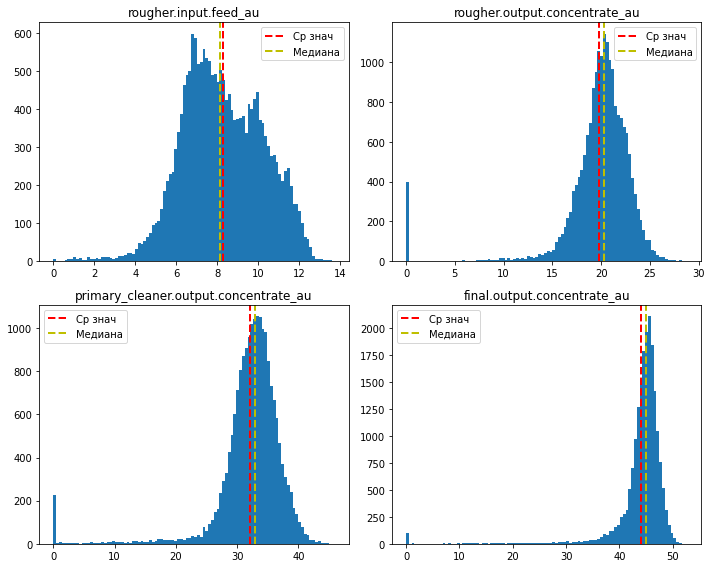

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.266097,19.772000,32.119400,44.076513
std,1.955092,3.753600,5.627611,5.129784
min,0.010000,0.000000,0.000000,0.000000
25%,6.854384,18.802523,30.463140,43.402215
50%,8.125839,20.280214,32.841295,45.011244
75%,9.769917,21.717843,35.048006,46.275313
max,13.731330,28.824507,45.933934,52.756638


In [ ]:
plot_histograms(concetrate_au,100)
concetrate_au.describe()

В исходном сырье концетрация золота сильно разнится от 4 до 12 едениц, к финальному этапу оно увеличивается до диапазона от 40 до 50 ед.и становится сосредоточена около этих значений.  
После этапа флотации в распределении очевидно наблюдаются выбросы - большое количество околонулевых значений, на мой взгляд это может быть связано с минимальным содержанием золота в руде.

**Распредление концентрата серебра.**

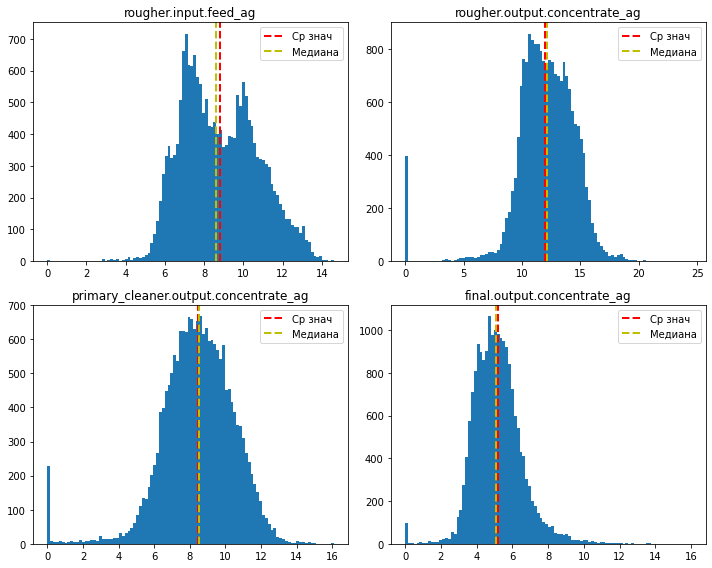

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000,19438.000000
mean,8.794927,11.994759,8.442408,5.168470
std,1.936847,2.733862,2.054465,1.372348
min,0.010000,0.000000,0.000000,0.000000
25%,7.237967,10.628337,7.263288,4.251240
50%,8.593574,12.098115,8.507298,5.066094
75%,10.213771,13.736996,9.809001,5.895527
max,14.596026,24.480271,16.081632,16.001945


In [ ]:
plot_histograms(concetrate_ag,100)
concetrate_ag.describe()

Серебро в изначальном сырье распределено неравномерно - его масса варьируется от 4 до 14 ед. К финальному этапу среднее кол-во едениц серебра становится равным от 4 до 7 едениц. Также наблюдается большое кодичество околонулевых значений на всех этапах.

**Распределение концентрата свинца.**

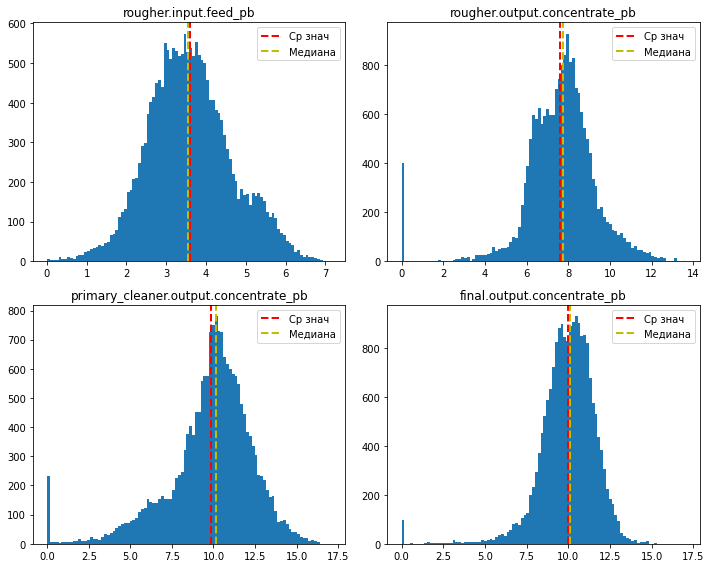

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19339.000000,19439.000000,19323.000000,19438.000000
mean,3.598085,7.606272,9.829530,9.978895
std,1.049486,1.796757,2.556843,1.669240
min,0.010000,0.000000,0.000000,0.000000
25%,2.887280,6.725987,8.702328,9.137262
50%,3.534895,7.742580,10.152433,10.102433
75%,4.244161,8.565199,11.424971,11.035769
max,7.142594,13.617072,17.081278,17.031899


In [ ]:
plot_histograms(concetrate_pb,100)
concetrate_pb.describe()

Содержание свинца на начальных этапах довольно низко, к концу обработки увеличивается и становится в среднем равно 10 ед. Также как и с остальными металлами, наблюдается большое число околонулевых значений.

**Распределение растворенных веществ.**

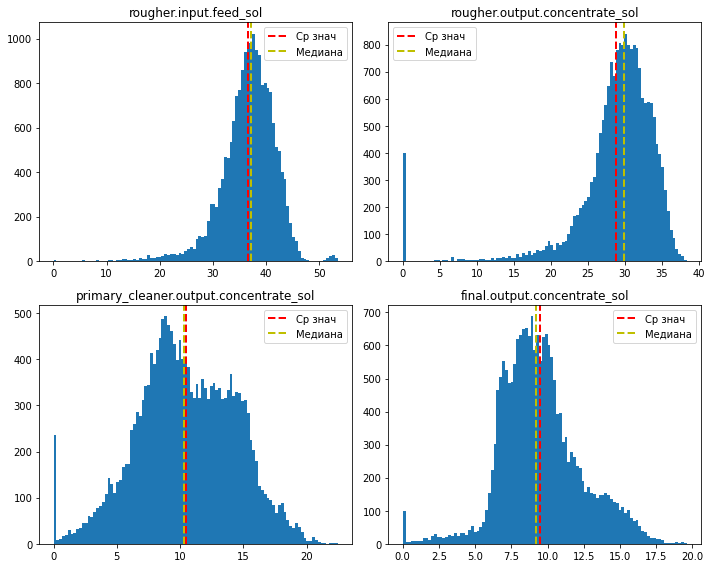

,rougher.input.feed_sol,rougher.output.concentrate_sol,primary_cleaner.output.concentrate_sol,final.output.concentrate_sol
count,19340.000000,19416.000000,19069.000000,19228.000000
mean,36.695114,28.805571,10.489499,9.501224
std,5.145445,5.944207,3.909639,2.787537
min,0.010000,0.000000,0.000000,0.000000
25%,34.207799,27.224120,7.893893,7.722820
50%,37.202650,29.835345,10.314632,9.218961
75%,40.039133,32.189933,13.446702,10.947813
max,53.477742,38.351193,22.458114,19.615720


In [ ]:
plot_histograms(concetrate_sol,100)
concetrate_sol.describe()

Концентрация остальных растворенных в сырье веществ к концу обработки заметно спадает.

**Обратим внимание на размер гранул сырья для обработки в двух выборках:**

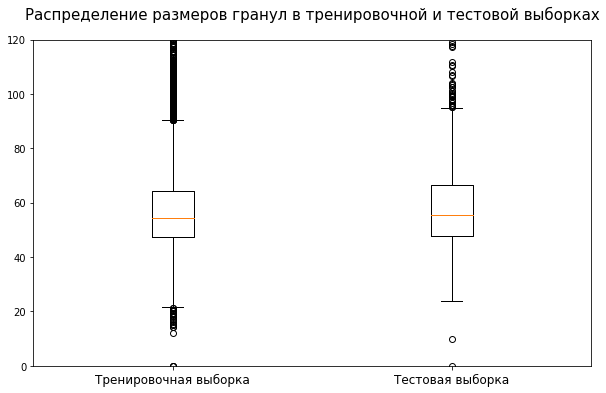

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([data_train['rougher.input.feed_size'],data_test['rougher.input.feed_size']]);
plt.title("Распределение размеров гранул в тренировочной и тестовой выборках", fontsize=15, pad=20);
plt.xticks([1, 2], ['Тренировочная выборка', 'Тестовая выборка'], fontsize=12)
plt.ylim(0,120);

Несмотря на наличие выбросов, данные о размерах гранул исходного сырья в тренировочной и тестовой выборках распределены похоже, следовательно можно продолжать исследование.

**Для каждого этапа найдём полученную полную концентрацию металлов на выходе.**

Построим функцию возвращающую датасет с суммарным знаением концентрации металлов в продукте на разных стадиях очистки.

In [ ]:
def concentrate_metal_func(data):
    data['rougher.input.feed_metal']=(data['rougher.input.feed_au']
                                        +data['rougher.input.feed_ag']
                                        +data['rougher.input.feed_pb'])
    data['rougher.output.concentrate_metal']=(data['rougher.output.concentrate_au']
                                                +data['rougher.output.concentrate_ag']
                                                +data['rougher.output.concentrate_pb'])
    data['primary_cleaner.output.concentrate_metal']=(data['primary_cleaner.output.concentrate_au']
                                                        +data['primary_cleaner.output.concentrate_ag']
                                                        +data['primary_cleaner.output.concentrate_pb'])
    data['final.output.concentrate_metal']=(data['final.output.concentrate_au']
                                              +data['final.output.concentrate_ag']
                                              +data['final.output.concentrate_pb'])

    concentrate_metal=data[['rougher.input.feed_metal',
                              'rougher.output.concentrate_metal',
                              'primary_cleaner.output.concentrate_metal',
                              'final.output.concentrate_metal']
                            ]
    return concentrate_metal

Визуализируем сводные данные.

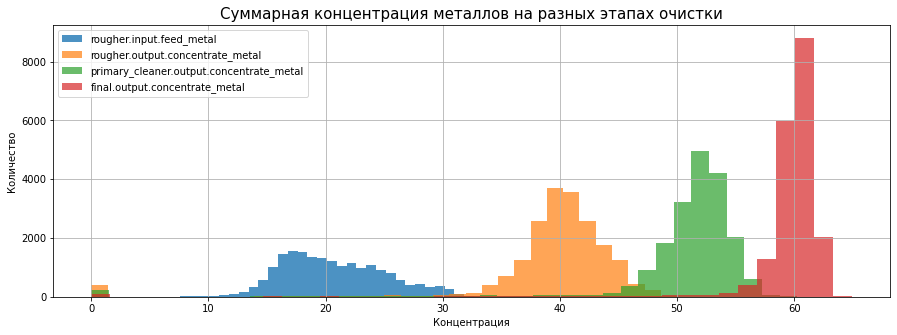

In [ ]:
concentrate_metal_full=concentrate_metal_func(data_full)
plt.figure(figsize=(15,5))
concentrate_metal_full['rougher.input.feed_metal'].hist(bins=40, alpha=0.8,
                                                        label='rougher.input.feed_metal');
concentrate_metal_full['rougher.output.concentrate_metal'].hist(bins=40, alpha=0.7,
                                                                label='rougher.output.concentrate_metal');
concentrate_metal_full['primary_cleaner.output.concentrate_metal'].hist(bins=40,
                                                                        alpha=0.7,
                                                                        label='primary_cleaner.output.concentrate_metal');
concentrate_metal_full['final.output.concentrate_metal'].hist(bins=40, alpha=0.7,
                                                              label='final.output.concentrate_metal');
plt.title('Суммарная концентрация металлов на разных этапах очистки', fontsize=15);
plt.xlabel('Концентрация');
plt.ylabel('Количество');
plt.legend();

Как и следовало ожидать количество значений с высокой концентрацией металлов увеличивается с каждым этапом очистки.
На выходе после каждого этапа присутствуют околонулевые значения. Предлагаю их отбросить, так как это  определенно выбросы - ведь так как мы выяснили, что некотрые значения вписаны в таблицу уже после процесса обработки сырья.

In [ ]:
def drop_NA(data):
    data=data[(data[['rougher.input.feed_metal',
                              'rougher.output.concentrate_metal',
                              'primary_cleaner.output.concentrate_metal',
                              'final.output.concentrate_metal']]>2).all(axis=1)]
    data=data.drop(['rougher.input.feed_metal',
                              'rougher.output.concentrate_metal',
                              'primary_cleaner.output.concentrate_metal',
                              'final.output.concentrate_metal'], axis=1)

    return data

In [ ]:
concentrate_metal_func(data_train)
data_train=drop_NA(data_train)
print('Количество строк в тренировочном датасете после обработки =',data_train.shape[0])

13877

## Модель

In [ ]:
RS=12345

Построим функцию для вычисления SMAPE:

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [ ]:
smape_scorer = make_scorer(smape, greater_is_better=False)

Для изучения моделей нам необходимо сделать два предикта - на выборке с результатами флотации и на общей. У каждой будут общие фичи, но в таргете заложим два два - 'rougher.output.recovery','final.output.recovery'.

In [ ]:
features_columns = list(data_test.columns[:-2])
target_columns = ['rougher.output.recovery','final.output.recovery']

Масштабируем фичи.

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = data_train[features_columns]
X_train = scaler.fit_transform(X_train)
y_train = data_train[target_columns]

Проверим три модели - Линейную Регрессию, Дерево Решений и Случайный Лес. Подберем лучшее значение гиперпараметров кросс-валидацией.

**Модель Линейной Регрессии:**

In [ ]:
%%time
lr = LinearRegression()
scores_rougher = cross_val_score(lr,X_train, y_train['rougher.output.recovery'], cv=5, scoring=smape_scorer)
scores_final = cross_val_score(lr, X_train,y_train['final.output.recovery'], cv=5, scoring=smape_scorer)
final_smape = np.mean(abs(scores_final) * 0.75) + np.mean(abs(scores_rougher) * 0.25)
print("Итоговое SMAPE модели Линейной Регрессии:", final_smape)

Итоговое SMAPE модели Линейной Регрессии: 8.980136185076764
CPU times: user 1.8 s, sys: 5.18 s, total: 6.98 s
Wall time: 6.96 s


**Модель Дерева Решений:**

In [ ]:
%%time
dt = DecisionTreeRegressor(random_state=RS)

params={'max_depth':[x for x in range(1,10)]}

grid_dt_rough=GridSearchCV(dt,params,cv=5,scoring=smape_scorer)
grid_dt_rough.fit(X_train,y_train['rougher.output.recovery'])

grid_dt_final=GridSearchCV(dt,params,cv=5,scoring=smape_scorer)
grid_dt_final.fit(X_train,y_train['final.output.recovery'])

print('Лучшие параметры для модели Дерева решений на флотацию:', grid_dt_rough.best_params_)
print('Лучшие финальные параметры для модели Дерева решений:', grid_dt_final.best_params_)
print('Итоговое SMAPE модели Дерева решений: =', abs(grid_dt_rough.best_score_)*0.25 + abs(grid_dt_final.best_score_)*0.75)

Лучшие параметры для модели Дерева решений на флотацию: {'max_depth': 5}
Лучшие финальные параметры для модели Дерева решений: {'max_depth': 2}
Итоговое SMAPE модели Дерева решений: = 8.326329355803265
CPU times: user 24.4 s, sys: 92.7 ms, total: 24.5 s
Wall time: 24.7 s


**Модель Случайного Леса:**

In [ ]:
%%time
rf = RandomForestRegressor(random_state=RS)

params = {'n_estimators':[x for x in range(0,100,10)], 'max_depth': [x for x in range(1,5)]}

grid_rf_rougher = GridSearchCV(rf, params, scoring=smape_scorer, cv=5)
grid_rf_rougher.fit(X_train, y_train['rougher.output.recovery'])

print('Лучшие параметры для модели Случайного Леса на флотацию:', grid_rf_rougher.best_params_)
print('Лучший SMAPE для модели Случайного Леса на флотацию:', abs(grid_rf_rougher.best_score_))

Лучшие параметры для модели Случайного Леса на флотацию: {'max_depth': 4, 'n_estimators': 10}
Лучший SMAPE для модели Случайного Леса на флотацию: 6.485028020727559
CPU times: user 13min 28s, sys: 3.31 s, total: 13min 31s
Wall time: 13min 32s


In [ ]:
%%time
grid_rf_final = GridSearchCV(rf, params, scoring=smape_scorer, cv=5)
grid_rf_final.fit(X_train, y_train['final.output.recovery'])

print('Лучшие финальные параметры для модели Случайного Леса:', grid_rf_final.best_params_)
print('Лучший финальный SMAPE для модели Случайного Леса:', abs(grid_rf_final.best_score_))
print()
print('Итоговое SMAPE модели Случайного Леса =', abs(grid_rf_rougher.best_score_)*0.25 + abs(grid_rf_final.best_score_)*0.75)

Лучшие финальные параметры для модели Случайного Леса: {'max_depth': 2, 'n_estimators': 10}
Лучший финальный SMAPE для модели Случайного Леса: 8.774229769525848

Итоговое SMAPE модели Случайного Леса = 8.201929332326277
CPU times: user 13min 17s, sys: 2.87 s, total: 13min 19s
Wall time: 13min 20s


Лучший показатель итогового SMAPE у модели Случайного Леса. Используем эту модель для расчета SMAPE на тестовой выборке.

**Расчет SMAPE лучшей модели на тестовой выборке:**

In [ ]:
X_test = data_test[features_columns]
X_test=scaler.transform(X_test)
y_test = data_test[target_columns]

In [ ]:
rd_rougher = RandomForestRegressor(random_state=RS, max_depth=4, n_estimators=10)
rd_rougher.fit(X_train, y_train['rougher.output.recovery'])
pred_rough=rd_rougher.predict(X_test)
smape_rough=smape(pred_rough,y_test['rougher.output.recovery'])

rd_final = RandomForestRegressor(random_state=RS, max_depth=2, n_estimators=10)
rd_final.fit(X_train, y_train['final.output.recovery'])
pred_final=rd_final.predict(X_test)
smape_final=smape(pred_final,y_test['final.output.recovery'])

smape_test=abs(smape_final*0.75)+abs(smape_rough*0.25)
smape_test

7.373809433919645

SMAPE на тестовой выборке получилось равным ~ 7.37%.

**Проверка модели на адекватность.**

In [ ]:
dr = DummyRegressor()
dr.fit(X_train, y_train['rougher.output.recovery'])
pred_dr_rough=dr.predict(X_test)
smape_dr_rough=smape(pred_dr_rough,y_test['rougher.output.recovery'])

dr.fit(X_train, y_train['final.output.recovery'])
pred_dr_final=dr.predict(X_test)
smape_dr_final=smape(pred_dr_final,y_test['final.output.recovery'])

smape_check=abs(smape_dr_final*0.75)+abs(smape_dr_rough*0.25)
smape_check

8.469085825154052

SMAPE константной модели значительно больше полученного, следовательно модель адекватно и ее можно брать в работу.

## Общий вывод.

В нашем распоряжении были относительно сырые тренировочные и тестовые данные по обработке золотосодержащей руды. Перед нами стояла задача расчитать метрику  SMAPE для двух этапов очистки.  
Для выполнения задачи - поиска оптимальной модели, предсказывающий коэффициент восстановления золота, мы провели обработку имеющихся датасетов: добавили в тестовый недостающие значения таргетов, заполнили пропуски интерполяцией по дата-индексу, избавились от околонулевых значений содержания общего колличества металлов в концентрате после обработки.  
Проанализировав обработанные данные мы выявили несколько закономерностей: концентрация золота на всех этапах прогресирует, а концентрация остальных металлов, а также раствореных веществ убывает.  
Выбрав несколько моделей регрессии, мы выявили лучший показатель SMAPE = 8.2% у модели Случайного Леса с гиперпараметрами max_depth = 4, n_estimators=10 на этапе флотации, и max_depth=2, n_estimators=10 на финальном этапе.
На тестовой выборке SMAPE = 7.37%, случайная же модель продемонстрировала этот показатель = 8.46%, что подтверждает адекватность нашей модели.